In [1]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | sudak
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | huarmey
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | stoyba
City not found. Skipping...
Processing Record 9 of Set 1 | terrace
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | peniche
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | wexford
Processing Record 18 of Set 1 | adrar
Processing Record 19 of Set 1 | labuhan
Processing Record 20 of Set 1 | san michele al tagliamento
Processing Record 21 of Set 1 | zaysan
Processing 

Processing Record 41 of Set 4 | amahai
Processing Record 42 of Set 4 | coquimbo
Processing Record 43 of Set 4 | isla vista
Processing Record 44 of Set 4 | namatanai
Processing Record 45 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 46 of Set 4 | conceicao da barra
Processing Record 47 of Set 4 | kedrovyy
Processing Record 48 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 4 | tucupita
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | tumpat
Processing Record 4 of Set 5 | tawnat
City not found. Skipping...
Processing Record 5 of Set 5 | guerrero negro
Processing Record 6 of Set 5 | alanya
Processing Record 7 of Set 5 | pangnirtung
Processing Record 8 of Set 5 | wahran
City not found. Skipping...
Processing Record 9 of Set 5 | stabat
Processing Record 10 of Set 5 | ilulissat
Processing Record 11 of Set 5 | novaya lyalya
Process

Processing Record 27 of Set 8 | hanzhong
Processing Record 28 of Set 8 | aklavik
Processing Record 29 of Set 8 | phalodi
Processing Record 30 of Set 8 | grande prairie
Processing Record 31 of Set 8 | ahuimanu
Processing Record 32 of Set 8 | carballo
Processing Record 33 of Set 8 | voh
Processing Record 34 of Set 8 | lubumbashi
Processing Record 35 of Set 8 | hofn
Processing Record 36 of Set 8 | presidencia roque saenz pena
Processing Record 37 of Set 8 | hami
Processing Record 38 of Set 8 | boyuibe
Processing Record 39 of Set 8 | saldanha
Processing Record 40 of Set 8 | french harbor
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | kalmunai
Processing Record 43 of Set 8 | warwick
Processing Record 44 of Set 8 | quatre cocos
Processing Record 45 of Set 8 | lima
Processing Record 46 of Set 8 | sur
Processing Record 47 of Set 8 | camacha
Processing Record 48 of Set 8 | lincoln
Processing Record 49 of Set 8 | muroto
Processing Record 50 of Set 8 | easton
Proces

Processing Record 17 of Set 12 | camopi
Processing Record 18 of Set 12 | riyadh
Processing Record 19 of Set 12 | bubaque
Processing Record 20 of Set 12 | harer
Processing Record 21 of Set 12 | dehloran
Processing Record 22 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 23 of Set 12 | pimentel
Processing Record 24 of Set 12 | saint-michel-des-saints
Processing Record 25 of Set 12 | imeni poliny osipenko
Processing Record 26 of Set 12 | celestun
Processing Record 27 of Set 12 | diego de almagro
Processing Record 28 of Set 12 | teya
Processing Record 29 of Set 12 | fatehpur sikri
Processing Record 30 of Set 12 | butembo
Processing Record 31 of Set 12 | rincon
Processing Record 32 of Set 12 | grand-santi
Processing Record 33 of Set 12 | mackay
Processing Record 34 of Set 12 | benguela
Processing Record 35 of Set 12 | udachnyy
Processing Record 36 of Set 12 | chunskiy
Processing Record 37 of Set 12 | vila franca do campo
Processing Record 38 of Set 12 | malumfashi
Process

In [6]:
len(city_data)

582

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.6789,156.1250,19.98,86,71,2.95,RU,2021-01-13 04:07:26
1,Busselton,-33.6500,115.3333,75.99,42,1,5.99,AU,2021-01-13 04:03:10
2,Sudak,44.8500,34.9667,49.05,93,100,4.88,UA,2021-01-13 04:07:26
3,Mataura,-46.1927,168.8643,79.99,37,37,4.29,NZ,2021-01-13 04:07:26
4,Huarmey,-10.0681,-78.1522,70.72,84,100,6.04,PE,2021-01-13 04:07:26
5,Jamestown,42.0970,-79.2353,27.00,100,90,7.20,US,2021-01-13 04:07:26
6,Terrace,54.5163,-128.6035,32.00,100,75,4.61,CA,2021-01-13 04:07:27
7,San Patricio,28.0170,-97.5169,42.80,87,40,3.36,US,2021-01-13 04:07:27
8,Peniche,39.3558,-9.3811,42.01,68,0,1.99,PT,2021-01-13 04:07:27
9,Butaritari,3.0707,172.7902,81.43,80,78,19.22,KI,2021-01-13 04:07:27


In [8]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2021-01-13 04:07:26,50.6789,156.1250,19.98,86,71,2.95
1,Busselton,AU,2021-01-13 04:03:10,-33.6500,115.3333,75.99,42,1,5.99
2,Sudak,UA,2021-01-13 04:07:26,44.8500,34.9667,49.05,93,100,4.88
3,Mataura,NZ,2021-01-13 04:07:26,-46.1927,168.8643,79.99,37,37,4.29
4,Huarmey,PE,2021-01-13 04:07:26,-10.0681,-78.1522,70.72,84,100,6.04
5,Jamestown,US,2021-01-13 04:07:26,42.0970,-79.2353,27.00,100,90,7.20
6,Terrace,CA,2021-01-13 04:07:27,54.5163,-128.6035,32.00,100,75,4.61
7,San Patricio,US,2021-01-13 04:07:27,28.0170,-97.5169,42.80,87,40,3.36
8,Peniche,PT,2021-01-13 04:07:27,39.3558,-9.3811,42.01,68,0,1.99
9,Butaritari,KI,2021-01-13 04:07:27,3.0707,172.7902,81.43,80,78,19.22


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

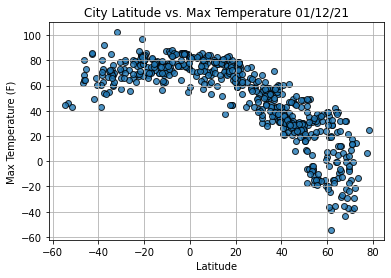

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

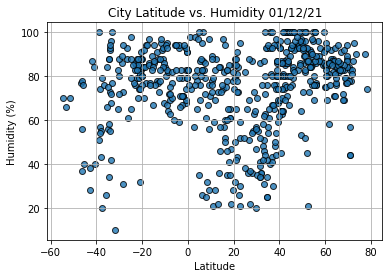

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

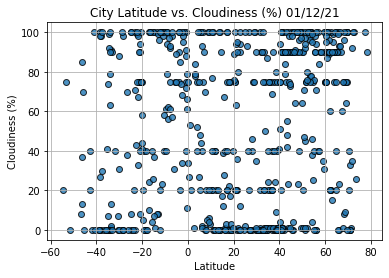

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

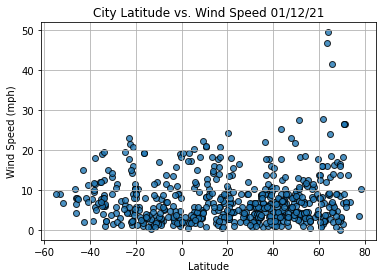

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()